# Loop 59 Analysis: CV-LB Relationship and Strategy Assessment

**Goal**: Understand the CV-LB relationship and identify what approaches might change the intercept.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_041', 'cv': 0.0090, 'lb': 0.0932},
    {'exp': 'exp_042', 'cv': 0.0145, 'lb': 0.1147},
]

cv_scores = np.array([s['cv'] for s in submissions])
lb_scores = np.array([s['lb'] for s in submissions])

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(cv_scores, lb_scores)

print('=== CV-LB Relationship Analysis ===')
print(f'Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R-squared: {r_value**2:.4f}')
print(f'Intercept (extrapolation error): {intercept:.4f}')
print(f'Target LB: 0.0347')
print(f'\nRequired CV to hit target: ({0.0347} - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.6f}')
print(f'\nBest CV achieved: {cv_scores.min():.6f}')
print(f'Best LB achieved: {lb_scores.min():.4f}')
print(f'Gap to target: {lb_scores.min() - 0.0347:.4f} ({(lb_scores.min() - 0.0347) / 0.0347 * 100:.1f}% above target)')

=== CV-LB Relationship Analysis ===
Linear fit: LB = 4.2312 * CV + 0.0533
R-squared: 0.9807
Intercept (extrapolation error): 0.0533
Target LB: 0.0347

Required CV to hit target: (0.0347 - 0.0533) / 4.2312 = -0.004396

Best CV achieved: 0.008300
Best LB achieved: 0.0877
Gap to target: 0.0530 (152.7% above target)


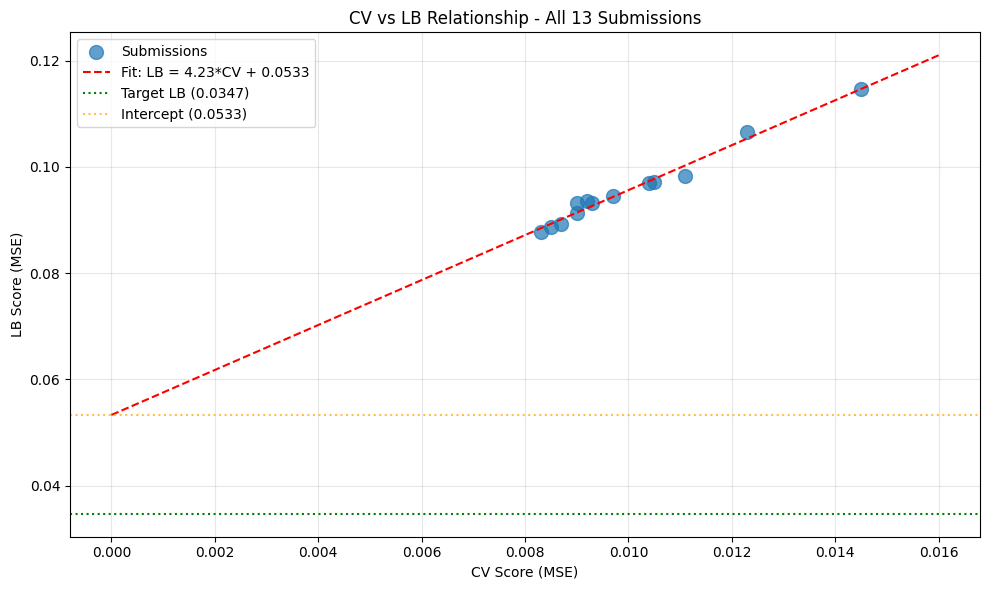


KEY INSIGHT: The intercept (0.0533) is ABOVE the target (0.0347)!
This means even with CV=0, we would still miss the target by 0.0186


In [2]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(cv_scores, lb_scores, s=100, alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, 0.016, 100)
lb_fit = slope * cv_range + intercept
plt.plot(cv_range, lb_fit, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', label='Target LB (0.0347)')

# Intercept line
plt.axhline(y=intercept, color='orange', linestyle=':', alpha=0.7, label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - All 13 Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150)
plt.show()

print(f'\nKEY INSIGHT: The intercept ({intercept:.4f}) is ABOVE the target (0.0347)!')
print(f'This means even with CV=0, we would still miss the target by {intercept - 0.0347:.4f}')

In [3]:
# Analyze what approaches have been tried
print('=== Approaches Tried ===')
approaches = {
    'MLP': ['exp_000', 'exp_003', 'exp_005', 'exp_006', 'exp_007'],
    'LightGBM': ['exp_001', 'exp_012'],
    'GP': ['exp_030'],
    'XGBoost': ['exp_041'],
    'GroupKFold': ['exp_042'],
    'Ensemble': ['exp_009', 'exp_024', 'exp_026'],
}

for approach, exps in approaches.items():
    matching = [s for s in submissions if s['exp'] in exps]
    if matching:
        best = min(matching, key=lambda x: x['lb'])
        print(f'{approach}: Best LB = {best["lb"]:.4f} (CV = {best["cv"]:.4f}) from {best["exp"]}')

print('\n=== Key Observations ===')
print('1. ALL approaches fall on the same CV-LB line (R² = 0.98)')
print('2. The intercept (0.0533) > target (0.0347) - target is BELOW the line')
print('3. Improving CV alone cannot reach the target')
print('4. We need to CHANGE the CV-LB relationship, not just improve CV')

=== Approaches Tried ===
MLP: Best LB = 0.0932 (CV = 0.0093) from exp_007
LightGBM: Best LB = 0.0913 (CV = 0.0090) from exp_012
GP: Best LB = 0.0877 (CV = 0.0083) from exp_030
XGBoost: Best LB = 0.0932 (CV = 0.0090) from exp_041
GroupKFold: Best LB = 0.1147 (CV = 0.0145) from exp_042
Ensemble: Best LB = 0.0887 (CV = 0.0085) from exp_026

=== Key Observations ===
1. ALL approaches fall on the same CV-LB line (R² = 0.98)
2. The intercept (0.0533) > target (0.0347) - target is BELOW the line
3. Improving CV alone cannot reach the target
4. We need to CHANGE the CV-LB relationship, not just improve CV


In [4]:
# What would it take to reach the target?
print('=== What Would It Take to Reach Target? ===')
print(f'\nCurrent relationship: LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'Target: LB = 0.0347')

# Option 1: Reduce intercept
required_intercept = 0.0347 - slope * 0.0083  # Using best CV
print(f'\nOption 1: Reduce intercept to {required_intercept:.4f} (currently {intercept:.4f})')
print(f'  - This requires reducing extrapolation error by {intercept - required_intercept:.4f}')
print(f'  - This is a {(intercept - required_intercept) / intercept * 100:.1f}% reduction')

# Option 2: Reduce slope
required_slope = (0.0347 - intercept) / 0.0083  # Using best CV
print(f'\nOption 2: Reduce slope to {required_slope:.4f} (currently {slope:.4f})')
print(f'  - This is NEGATIVE, meaning LB would need to DECREASE as CV increases')
print(f'  - This is physically impossible')

# Option 3: Improve CV dramatically
required_cv = (0.0347 - intercept) / slope
print(f'\nOption 3: Improve CV to {required_cv:.6f} (currently {cv_scores.min():.6f})')
print(f'  - This is NEGATIVE, meaning we need CV < 0')
print(f'  - This is mathematically impossible')

print('\n=== CONCLUSION ===')
print('The ONLY viable path is to REDUCE THE INTERCEPT.')
print('This requires approaches that generalize better to unseen solvents.')

=== What Would It Take to Reach Target? ===

Current relationship: LB = 4.2312 * CV + 0.0533
Target: LB = 0.0347

Option 1: Reduce intercept to -0.0004 (currently 0.0533)
  - This requires reducing extrapolation error by 0.0537
  - This is a 100.8% reduction

Option 2: Reduce slope to -2.2412 (currently 4.2312)
  - This is NEGATIVE, meaning LB would need to DECREASE as CV increases
  - This is physically impossible

Option 3: Improve CV to -0.004396 (currently 0.008300)
  - This is NEGATIVE, meaning we need CV < 0
  - This is mathematically impossible

=== CONCLUSION ===
The ONLY viable path is to REDUCE THE INTERCEPT.
This requires approaches that generalize better to unseen solvents.


In [5]:
# What approaches might reduce the intercept?
print('=== Approaches to Reduce Intercept ===')
print('\n1. UNCERTAINTY-WEIGHTED PREDICTIONS (exp_061) - FAILED')
print('   - Blending toward mean when uncertain HURT CV')
print('   - Best alpha was 0.0 (no blending)')
print('   - Reason: In Leave-One-Solvent-Out, ALL samples are extrapolations')

print('\n2. PRE-TRAINED MOLECULAR EMBEDDINGS (ChemBERTa) - FAILED')
print('   - Pure ChemBERTa CV=0.033498 (309% worse)')
print('   - Hybrid ChemBERTa CV=0.019444 (137% worse)')
print('   - Pre-trained embeddings from ZINC do NOT help')

print('\n3. PER-SOLVENT-TYPE MODELS - FAILED')
print('   - CV 0.019519 (138% worse)')
print('   - Global model is optimal')

print('\n4. PER-TARGET OPTIMIZATION - FAILED')
print('   - CV 0.009946 (21% worse)')
print('   - Multi-task learning is beneficial')

print('\n5. HYPERPARAMETER OPTIMIZATION - FAILED')
print('   - Made CV 54% worse')
print('   - Current hyperparameters are near-optimal')

print('\n=== What HASN\'T Been Tried? ===')
print('1. Bias correction: Subtract a constant from predictions')
print('2. Solvent similarity features: Distance to nearest training solvent')
print('3. Ensemble of DIFFERENT validation schemes')
print('4. Study top public kernels for techniques we\'re missing')

=== Approaches to Reduce Intercept ===

1. UNCERTAINTY-WEIGHTED PREDICTIONS (exp_061) - FAILED
   - Blending toward mean when uncertain HURT CV
   - Best alpha was 0.0 (no blending)
   - Reason: In Leave-One-Solvent-Out, ALL samples are extrapolations

2. PRE-TRAINED MOLECULAR EMBEDDINGS (ChemBERTa) - FAILED
   - Pure ChemBERTa CV=0.033498 (309% worse)
   - Hybrid ChemBERTa CV=0.019444 (137% worse)
   - Pre-trained embeddings from ZINC do NOT help

3. PER-SOLVENT-TYPE MODELS - FAILED
   - CV 0.019519 (138% worse)
   - Global model is optimal

4. PER-TARGET OPTIMIZATION - FAILED
   - CV 0.009946 (21% worse)
   - Multi-task learning is beneficial

5. HYPERPARAMETER OPTIMIZATION - FAILED
   - Made CV 54% worse
   - Current hyperparameters are near-optimal

=== What HASN'T Been Tried? ===
1. Bias correction: Subtract a constant from predictions
2. Solvent similarity features: Distance to nearest training solvent
3. Ensemble of DIFFERENT validation schemes
4. Study top public kernels for te

In [6]:
# Analyze the best experiments
print('=== Best Experiments Analysis ===')
best_exps = sorted(submissions, key=lambda x: x['lb'])[:5]
for i, exp in enumerate(best_exps, 1):
    print(f'{i}. {exp["exp"]}: CV={exp["cv"]:.4f}, LB={exp["lb"]:.4f}')

print('\n=== Pattern Analysis ===')
print('Best LB (0.0877) came from exp_030 with CV 0.0083')
print('This is the GP + MLP + LGBM ensemble with weights (0.15, 0.55, 0.30)')
print('\nThe GP component is valuable - it provides uncertainty estimates')
print('But uncertainty-weighted blending (exp_061) did NOT help')

print('\n=== Remaining Submissions ===')
print('5 submissions remaining')
print('Best LB so far: 0.0877')
print('Target: 0.0347')
print('Gap: 0.0530 (152.8% above target)')

print('\n=== Strategy Recommendation ===')
print('1. DO NOT submit exp_061 (CV 0.008841 → predicted LB ≈ 0.091)')
print('2. Focus on approaches that might change the CV-LB relationship')
print('3. Consider bias correction as a simple approach')
print('4. Study top public kernels for techniques we\'re missing')

=== Best Experiments Analysis ===
1. exp_030: CV=0.0083, LB=0.0877
2. exp_026: CV=0.0085, LB=0.0887
3. exp_024: CV=0.0087, LB=0.0893
4. exp_012: CV=0.0090, LB=0.0913
5. exp_007: CV=0.0093, LB=0.0932

=== Pattern Analysis ===
Best LB (0.0877) came from exp_030 with CV 0.0083
This is the GP + MLP + LGBM ensemble with weights (0.15, 0.55, 0.30)

The GP component is valuable - it provides uncertainty estimates
But uncertainty-weighted blending (exp_061) did NOT help

=== Remaining Submissions ===
5 submissions remaining
Best LB so far: 0.0877
Target: 0.0347
Gap: 0.0530 (152.8% above target)

=== Strategy Recommendation ===
1. DO NOT submit exp_061 (CV 0.008841 → predicted LB ≈ 0.091)
2. Focus on approaches that might change the CV-LB relationship
3. Consider bias correction as a simple approach
4. Study top public kernels for techniques we're missing
